In [1]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [22]:
target = 'target'
train = pd.read_parquet('train.parquet')
val = pd.read_parquet('val.parquet')
test = pd.read_parquet('test.parquet')

# FIRST

In [23]:
dtrain = xgb.DMatrix(train.drop(columns=target), label=train[target])
dval = xgb.DMatrix(val.drop(columns=target), label=val[target])
dtest = xgb.DMatrix(test.drop(columns=target), label=test[target])

# 4. Параметры модели
params = {
    'objective': 'binary:logistic',
    'eta': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

evals = [(dtrain, 'train'), (dval, 'val')]
model = xgb.train(params, 
                  dtrain, 
                  num_boost_round=100, 
                  evals=evals,
                  early_stopping_rounds=10,
                  verbose_eval=10)

[0]	train-logloss:0.64170	val-logloss:0.64954
[10]	train-logloss:0.31913	val-logloss:0.37282
[20]	train-logloss:0.20090	val-logloss:0.26724
[30]	train-logloss:0.13643	val-logloss:0.20289
[40]	train-logloss:0.10314	val-logloss:0.17085
[50]	train-logloss:0.08015	val-logloss:0.15055
[60]	train-logloss:0.06592	val-logloss:0.13878
[70]	train-logloss:0.05573	val-logloss:0.12744
[80]	train-logloss:0.04793	val-logloss:0.11937
[90]	train-logloss:0.04262	val-logloss:0.11412
[99]	train-logloss:0.03811	val-logloss:0.11000


In [24]:
y_pred_prob = model.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)

def print_metrics(y_true, y_pred, y_pred_prob):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_pred_prob))

print("\nTest set metrics:")
print_metrics(test[target], y_pred, y_pred_prob)

print("\nTrain set metrics:")
y_train_pred_prob = model.predict(dtrain)
y_train_pred = (y_train_pred_prob > 0.5).astype(int)
print_metrics(train[target], y_train_pred, y_train_pred_prob)

print("\nValidation set metrics:")
y_val_pred_prob = model.predict(dval)
y_val_pred = (y_val_pred_prob > 0.5).astype(int)
print_metrics(val[target], y_val_pred, y_val_pred_prob)


Test set metrics:
Accuracy: 0.9365079365079365
Precision: 0.9278350515463918
Recall: 0.9473684210526315
F1-score: 0.9375
ROC-AUC: 0.9869260918253079

Train set metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
ROC-AUC: 1.0

Validation set metrics:
Accuracy: 0.9656084656084656
Precision: 0.9611650485436893
Recall: 0.9753694581280788
F1-score: 0.9682151589242054
ROC-AUC: 0.9939479239971851


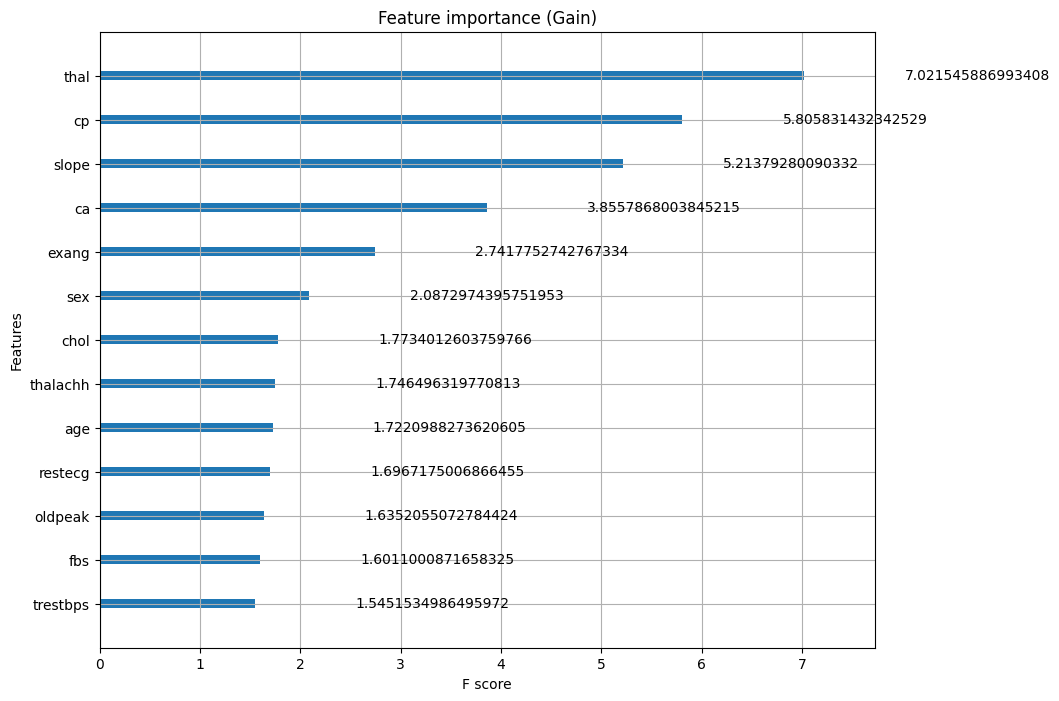

In [25]:
from xgboost import plot_importance

fig, ax = plt.subplots(figsize=(10, 8))
plot_importance(model, ax=ax, importance_type='gain', max_num_features=20)
plt.title("Feature importance (Gain)")
plt.show()

# SECOND

In [26]:
train = train.drop(columns=['trestbps', 'fbs', 'oldpeak', 'restecg'])
val = val.drop(columns=['trestbps', 'fbs', 'oldpeak', 'restecg'])
test = test.drop(columns=['trestbps', 'fbs', 'oldpeak', 'restecg'])

In [27]:
dtrain = xgb.DMatrix(train.drop(columns=target), label=train[target])
dval = xgb.DMatrix(val.drop(columns=target), label=val[target])
dtest = xgb.DMatrix(test.drop(columns=target), label=test[target])

# 4. Параметры модели
params = {
    'objective': 'binary:logistic',
    'eta': 0.1,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42
}

evals = [(dtrain, 'train'), (dval, 'val')]
model = xgb.train(params, 
                  dtrain, 
                  num_boost_round=100, 
                  evals=evals,
                  early_stopping_rounds=10,
                  verbose_eval=10)

[0]	train-logloss:0.63632	val-logloss:0.64817
[10]	train-logloss:0.33331	val-logloss:0.38758
[20]	train-logloss:0.21416	val-logloss:0.28601
[30]	train-logloss:0.15817	val-logloss:0.23601
[40]	train-logloss:0.12410	val-logloss:0.20796
[50]	train-logloss:0.10240	val-logloss:0.18672
[60]	train-logloss:0.08861	val-logloss:0.17576
[70]	train-logloss:0.07901	val-logloss:0.16702
[80]	train-logloss:0.07136	val-logloss:0.16046
[90]	train-logloss:0.06387	val-logloss:0.15271
[99]	train-logloss:0.05839	val-logloss:0.14823


In [28]:
y_pred_prob = model.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)

def print_metrics(y_true, y_pred, y_pred_prob):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_pred_prob))

print("\nTest set metrics:")
print_metrics(test[target], y_pred, y_pred_prob)

print("\nTrain set metrics:")
y_train_pred_prob = model.predict(dtrain)
y_train_pred = (y_train_pred_prob > 0.5).astype(int)
print_metrics(train[target], y_train_pred, y_train_pred_prob)

print("\nValidation set metrics:")
y_val_pred_prob = model.predict(dval)
y_val_pred = (y_val_pred_prob > 0.5).astype(int)
print_metrics(val[target], y_val_pred, y_val_pred_prob)


Test set metrics:
Accuracy: 0.9338624338624338
Precision: 0.9365079365079365
Recall: 0.9315789473684211
F1-score: 0.9340369393139841
ROC-AUC: 0.9848544232922734

Train set metrics:
Accuracy: 0.9964664310954063
Precision: 0.9965753424657534
Recall: 0.9965753424657534
F1-score: 0.9965753424657534
ROC-AUC: 0.9999625037496251

Validation set metrics:
Accuracy: 0.9444444444444444
Precision: 0.941747572815534
Recall: 0.9556650246305419
F1-score: 0.9486552567237164
ROC-AUC: 0.9867980295566503


# LAST

In [29]:
import optuna
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold

def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'tree_method': 'hist',
        'verbosity': 0,
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
    }
    
    model = xgb.XGBClassifier(**params)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, train.drop(columns=target), train[target], cv=skf, scoring='roc_auc', n_jobs=-1)
    
    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200)


print("Best trial:")
trial = study.best_trial
print(f"  ROC-AUC: {trial.value:.5f}")
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")

[I 2025-04-10 12:08:24,448] A new study created in memory with name: no-name-fe03733d-d023-4cc1-a5b4-ad4417c70227
[I 2025-04-10 12:08:25,449] Trial 0 finished with value: 0.9443425764716494 and parameters: {'learning_rate': 0.2483834155295771, 'max_depth': 3, 'min_child_weight': 6, 'subsample': 0.6675597737052497, 'colsample_bytree': 0.36162458271937803, 'n_estimators': 757}. Best is trial 0 with value: 0.9443425764716494.
[I 2025-04-10 12:08:25,961] Trial 1 finished with value: 0.8778837077366024 and parameters: {'learning_rate': 0.2731255392761906, 'max_depth': 5, 'min_child_weight': 9, 'subsample': 0.1739702642696022, 'colsample_bytree': 0.3173786614402599, 'n_estimators': 949}. Best is trial 0 with value: 0.9443425764716494.
[I 2025-04-10 12:08:26,518] Trial 2 finished with value: 0.9398109265334826 and parameters: {'learning_rate': 0.18317074720867474, 'max_depth': 3, 'min_child_weight': 5, 'subsample': 0.541895283919209, 'colsample_bytree': 0.24574704048899376, 'n_estimators': 12

Best trial:
  ROC-AUC: 0.98535
  Params: 
    learning_rate: 0.01917284861327599
    max_depth: 7
    min_child_weight: 1
    subsample: 0.9639247813577054
    colsample_bytree: 0.8183394272860759
    n_estimators: 406


In [32]:
dtrain = xgb.DMatrix(train.drop(columns=target), label=train[target])
dval = xgb.DMatrix(val.drop(columns=target), label=val[target])
dtest = xgb.DMatrix(test.drop(columns=target), label=test[target])

# 4. Параметры модели
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'tree_method': 'hist',
    'verbosity': 0,
    'learning_rate': 0.01917284861327599,
    'max_depth': 7,
    'subsample': 0.9639247813577054,
    'colsample_bytree': 0.8183394272860759,
    'n_estimators': 406,
    'seed': 42
}

evals = [(dtrain, 'train'), (dval, 'val')]
model = xgb.train(params, 
                  dtrain,
                  num_boost_round=100,
                  evals=evals)

[0]	train-logloss:0.68152	val-logloss:0.68209
[1]	train-logloss:0.66907	val-logloss:0.67182
[2]	train-logloss:0.65774	val-logloss:0.66227
[3]	train-logloss:0.64631	val-logloss:0.65257
[4]	train-logloss:0.63644	val-logloss:0.64489
[5]	train-logloss:0.62557	val-logloss:0.63501
[6]	train-logloss:0.61456	val-logloss:0.62505
[7]	train-logloss:0.60447	val-logloss:0.61594
[8]	train-logloss:0.59437	val-logloss:0.60687
[9]	train-logloss:0.58504	val-logloss:0.59966
[10]	train-logloss:0.57572	val-logloss:0.59237
[11]	train-logloss:0.56670	val-logloss:0.58459
[12]	train-logloss:0.55756	val-logloss:0.57701
[13]	train-logloss:0.54861	val-logloss:0.56881
[14]	train-logloss:0.54013	val-logloss:0.56185
[15]	train-logloss:0.53132	val-logloss:0.55398
[16]	train-logloss:0.52322	val-logloss:0.54693
[17]	train-logloss:0.51471	val-logloss:0.53984
[18]	train-logloss:0.50731	val-logloss:0.53365
[19]	train-logloss:0.49954	val-logloss:0.52717
[20]	train-logloss:0.49177	val-logloss:0.52055
[21]	train-logloss:0.48

In [33]:
y_pred_prob = model.predict(dtest)
y_pred = (y_pred_prob > 0.5).astype(int)

def print_metrics(y_true, y_pred, y_pred_prob):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1-score:", f1_score(y_true, y_pred))
    print("ROC-AUC:", roc_auc_score(y_true, y_pred_prob))

print("\nTest set metrics:")
print_metrics(test[target], y_pred, y_pred_prob)

print("\nTrain set metrics:")
y_train_pred_prob = model.predict(dtrain)
y_train_pred = (y_train_pred_prob > 0.5).astype(int)
print_metrics(train[target], y_train_pred, y_train_pred_prob)

print("\nValidation set metrics:")
y_val_pred_prob = model.predict(dval)
y_val_pred = (y_val_pred_prob > 0.5).astype(int)
print_metrics(val[target], y_val_pred, y_val_pred_prob)


Test set metrics:
Accuracy: 0.9047619047619048
Precision: 0.9139784946236559
Recall: 0.8947368421052632
F1-score: 0.9042553191489362
ROC-AUC: 0.9746640537513998

Train set metrics:
Accuracy: 0.9787985865724381
Precision: 0.9827586206896551
Recall: 0.976027397260274
F1-score: 0.979381443298969
ROC-AUC: 0.9982689231076893

Validation set metrics:
Accuracy: 0.9285714285714286
Precision: 0.9356435643564357
Recall: 0.9310344827586207
F1-score: 0.9333333333333333
ROC-AUC: 0.9817311752287121
